##  Demonstration of compression 

In [1]:
from pit import *
import scipy.ndimage as spimg
import matplotlib.pyplot as plt
import glob
import os

def comp(image, s):
    '''Compress image to s coefficients'''
    T = DCT( image.shape )
#     T = WT(shape, wavelet='db2',level=2, amplify=10)
    TO = hardTO(s)
    
    x = T(image)
    x = TO(x) 
    return T.inv(x)

Left: j-th coefficient in row j+1
Right: sum of coefficients up to j in row j+1


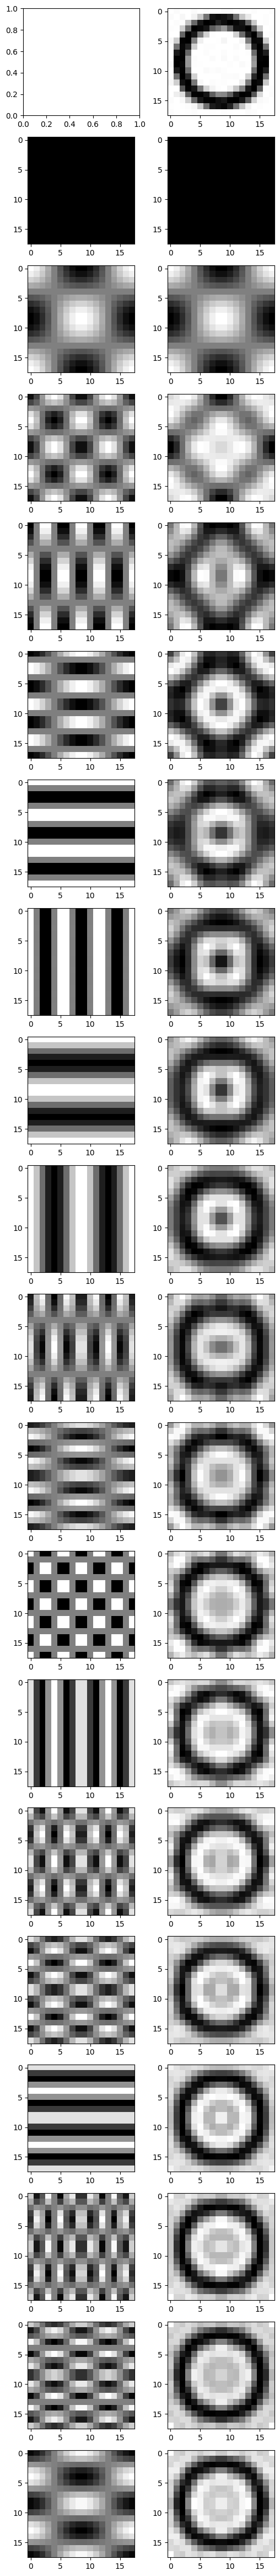

In [2]:
# load circle
im0 = rgb2gray(plt.imread(r"E:\CS_image_recovery_demo\pics\circle.jpg"))
# im0 = spimg.zoom(im0, .04)

# number of coeffcients
anz = 20
f, axarr = plt.subplots(anz, 2)
f.set_size_inches(h=3*anz,w=6)

axarr[0,1].imshow(im0, interpolation='nearest', cmap=plt.cm.gray)

# calculate coefficients
Im = [im0] + [comp(im0, s) for s in range(1,anz)]
axarr[1,0].imshow(Im[1], interpolation='nearest', cmap=plt.cm.gray)#, vmin = 0, vmax = 300)

# add coefficients to plot
for s in range(2,anz):   
    axarr[s,0].imshow(Im[s]-Im[s-1], interpolation='nearest', cmap=plt.cm.gray)

for s in range(1,anz):
    axarr[s,1].imshow(Im[s], interpolation='nearest', cmap=plt.cm.gray)

print("Left: j-th coefficient in row j+1")
print("Right: sum of coefficients up to j in row j+1")
plt.show()